# 04_Training_Models

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time
np.random.seed(42)

In [5]:
# Mock dataset
X=2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)

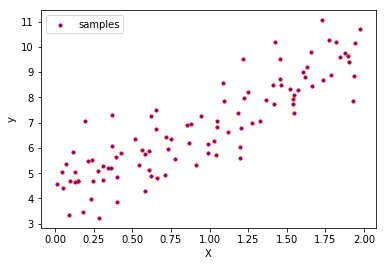

In [6]:
plt.scatter(X,y,facecolor='b',edgecolor='red',s=10,label='samples')
plt.ylabel('y')
plt.xlabel('X')
plt.legend(loc='best')
plt.show()

In [12]:
X_b=np.c_[np.ones((100,1)),X]
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [13]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [14]:
X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)),X_new]
y_predict=X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

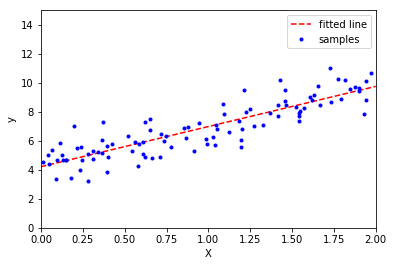

In [19]:
plt.plot(X_new,y_predict,'r--',label='fitted line')
plt.plot(X,y,'b.',label='samples')
plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('y')
plt.axis([0,2,0,15])
plt.show()

In [52]:
from sklearn.linear_model import LinearRegression
  
lin_reg=LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [54]:
lin_reg.intercept_,lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [55]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [56]:
eta=0.1
n_iterations=1000
m=100
theta=np.random.randn(2,1)
for iteration in range(n_iterations):
    gradients=2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta=theta-eta*gradients

In [57]:
theta

array([[4.21509616],
       [2.77011339]])

In [58]:
X_new_b

array([[1., 0.],
       [1., 2.]])

In [81]:
def drawFittingLines(eta,n_iterations):
    theta=np.random.randn(2,1)
    for iteration in range(n_iterations):
        gradient=2/m*X_b.T.dot(X_b.dot(theta)-y)
        theta=theta-eta*gradient
        y_pred=X_new_b.dot(theta)
        plt.plot(X_new,y_pred,'r-')
        plt.axis([0,2,0,15])
        plt.title('eta='+str(eta))
    

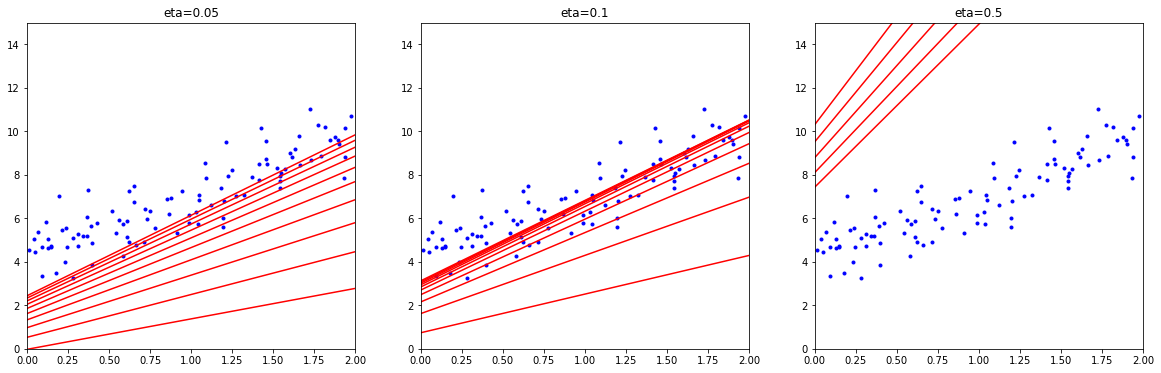

In [87]:
plt.figure(figsize=(20,6))
plt.subplot(131)
plt.plot(X,y,'b.')
drawFittingLines(0.05,10)
plt.subplot(132)
plt.plot(X,y,'b.')
drawFittingLines(0.1,10)
plt.subplot(133)
plt.plot(X,y,'b.')
drawFittingLines(0.5,10)

In [122]:
def gradientChanges(eta,n_iterations):
    theta=np.random.randn(2,1)
    gradients=[]
    for iteration in range(n_iterations):
        gradient=2/m*X_b.T.dot(X_b.dot(theta)-y)
        theta=theta-eta*gradient
        gradients.append(np.linalg.norm(gradient))
    plt.plot(gradients,'r-')

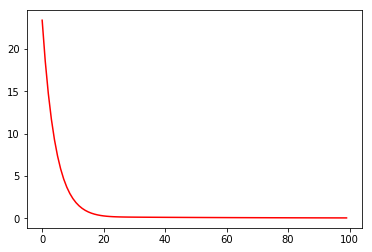

In [129]:
gradientChanges(0.05,100) 

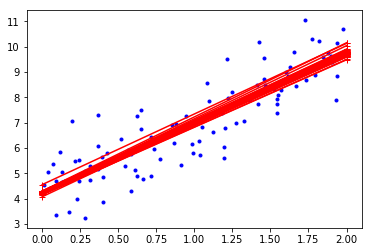

In [140]:
# simulated annealing method
n_epoches=50
t0,t1=5,50

def learning_schedule(t):
    return t0/(t+t1)

theta=np.random.randn(2,1)

plt.plot(X,y,'b.')

for epoch in range(n_epoches):
    for i in range(m):
        rand_index=np.random.randint(m)
        xi=X_b[rand_index:rand_index+1]
        yi=y[rand_index:rand_index+1]
        gradient=2*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(epoch*m+i)
        theta=theta-eta*gradient
        y_pred=X_new_b.dot(theta)
        
    plt.plot(X_new,y_pred,'r-+')
plt.show()

In [141]:
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(n_iter=50,penalty=None,eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=50, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [143]:
sgd_reg.intercept_,sgd_reg.coef_

(array([4.22792358]), array([2.78072355]))

# Polynomial fitting

In [155]:
# generate nonlinear data
np.random.seed(42)
m=100
X=6*np.random.rand(m,1)-3
y=0.5*X**2+X+2+np.random.randn(m,1)

In [157]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly_features.fit_transform(X)

In [158]:
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_ 

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

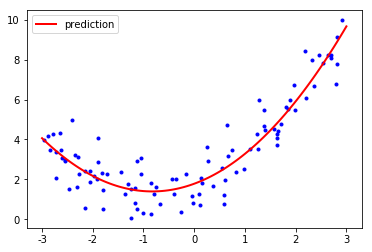

In [184]:
X_new=np.array(np.linspace(-3,3,100)).reshape(-1,1)
X_new_poly=poly_features.fit_transform(X_new)
y_pred=lin_reg.predict(X_new_poly)
plt.plot(X,y,'b.')
plt.plot(X_new,y_pred,'r-',linewidth=2,label='prediction')
plt.legend(loc='upper left')
plt.show()

In [189]:
# Learning Curves
poly_Features_300=PolynomialFeatures(degree=300,include_bias=False)
poly_Features_2=PolynomialFeatures(degree=2,include_bias=False)

X_poly_300=poly_Features_300.fit_transform(X)
X_poly_2=poly_Features_2.fit_transform(X)

In [192]:
lin_reg_300=LinearRegression()
lin_reg_300.fit(X_poly_300,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [193]:
lin_reg_2=LinearRegression()
lin_reg_2.fit(X_poly_2,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [194]:
X_train=np.array(np.linspace(-3,3,100)).reshape(-1,1)

In [ ]:
y_pred_300=lin_reg_300.predict()

In [21]:
np.random.randint(100)

20